In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
#read csv
df = pd.read_csv('Downloads/loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
#feature transformation
for col_name in df.columns:
 if(df[col_name].dtype == 'object'):
     df[col_name]= df[col_name].astype('category')
     df[col_name] = df[col_name].cat.codes

In [4]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [5]:
#checking null values
print(df.isna().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


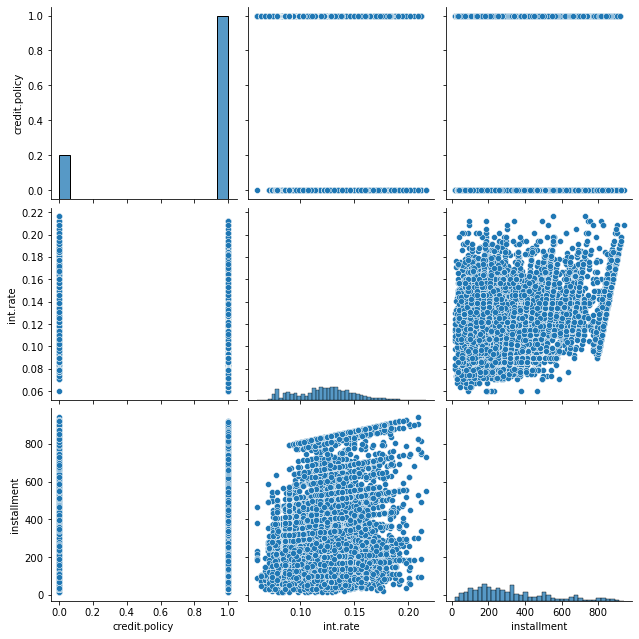

In [6]:
sns.pairplot(data=df, vars=['credit.policy','int.rate','installment'], height=3)
plt.show()

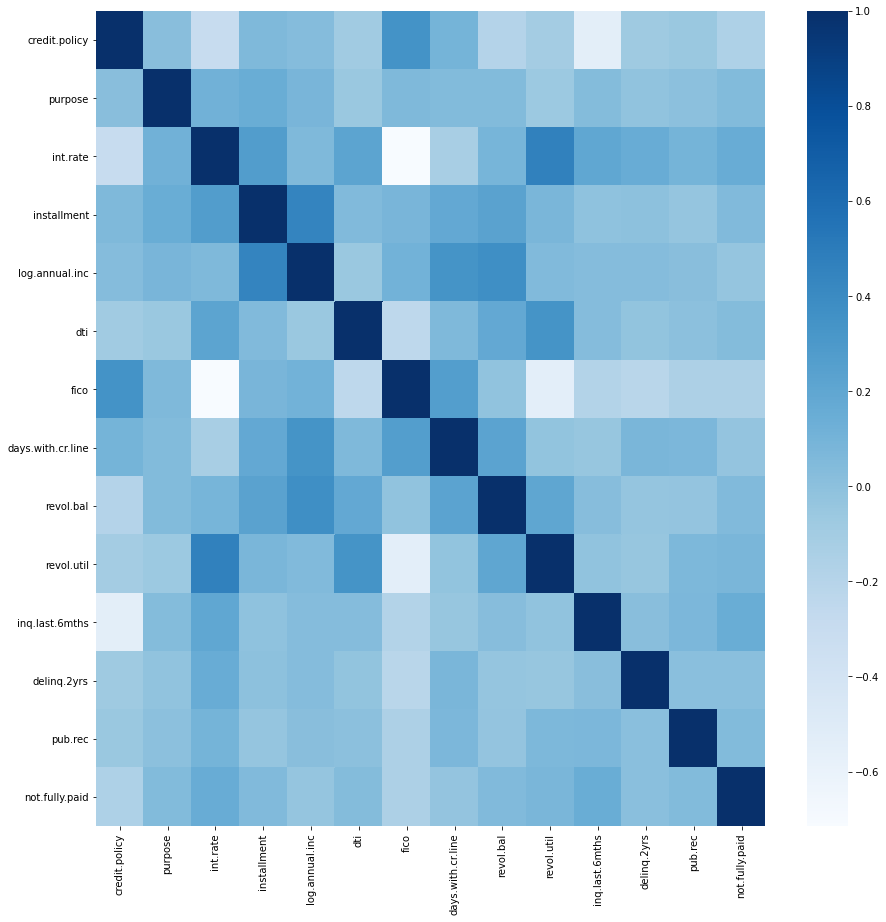

In [7]:
#correlation matrices
plt.figure(figsize=(15,15))
sns.heatmap(df[df.columns].corr(),cmap='Blues')
plt.show()

In [8]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

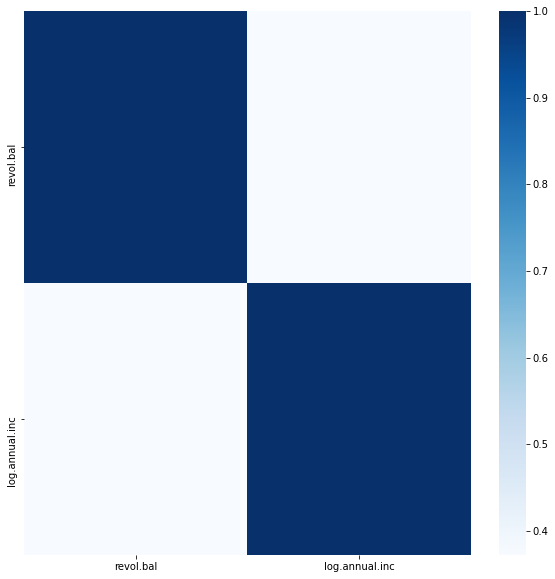

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['revol.bal','log.annual.inc']].corr(), cmap='Blues')
plt.show()

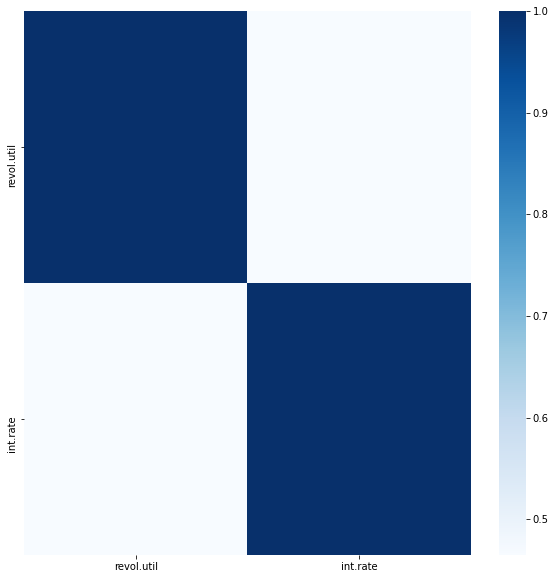

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['revol.util','int.rate']].corr(), cmap='Blues')
plt.show()

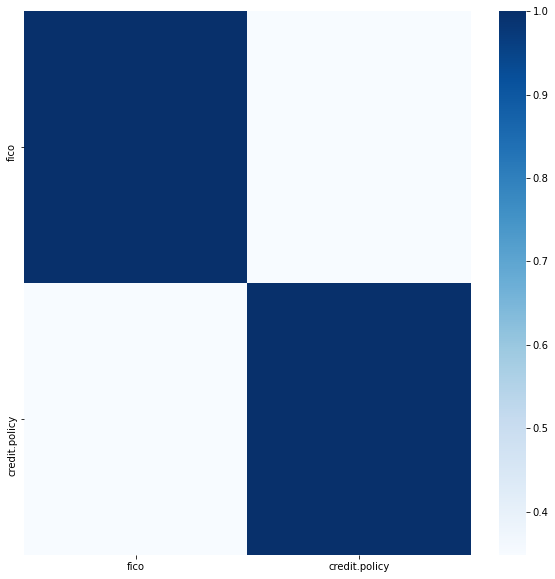

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['fico','credit.policy']].corr(), cmap='Blues')
plt.show()

# Dropping columns which have a high correlation 


## Since the pairs, (int.rate, revol.util),(fico,credi.policy) and (revol.balance,log.annual.inc) have a higher correlation than other feature pairs,

## The following columns have been droppped: REVOL.UTIL,REVOL.BALANCE,FICO

In [12]:
df.drop(['revol.util', 'revol.bal','fico'], axis = 1,inplace=True)
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,days.with.cr.line,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,5639.958333,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,2760.000000,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,4710.000000,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,2699.958333,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,4066.000000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,10474.000000,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,4380.000000,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,3450.041667,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,1800.000000,5,0,0,1


In [13]:
X = df.drop(['not.fully.paid'],axis=1).values
y = df['not.fully.paid'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
classifier = Sequential()
classifier.add(Dense(32, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(64, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))
classifier.compile(optimizer="Adam",loss = "binary_crossentropy",metrics = ["accuracy"])
history=classifier.fit(X_train, y_train, batch_size = 20, epochs = 1000)

Epoch 1/1000
384/384 [==============================] - 1s 630us/step - loss: 0.4567 - accuracy: 0.8372
Epoch 2/1000
384/384 [==============================] - 0s 628us/step - loss: 0.4152 - accuracy: 0.8403
Epoch 3/1000
384/384 [==============================] - 0s 615us/step - loss: 0.4147 - accuracy: 0.8403
Epoch 4/1000
384/384 [==============================] - 0s 615us/step - loss: 0.4135 - accuracy: 0.8403
Epoch 5/1000
384/384 [==============================] - 0s 615us/step - loss: 0.4137 - accuracy: 0.8403
Epoch 6/1000
384/384 [==============================] - 0s 620us/step - loss: 0.4129 - accuracy: 0.8403
Epoch 7/1000
384/384 [==============================] - 0s 609us/step - loss: 0.4130 - accuracy: 0.8403
Epoch 8/1000
384/384 [==============================] - 0s 612us/step - loss: 0.4124 - accuracy: 0.8403
Epoch 9/1000
384/384 [==============================] - 0s 612us/step - loss: 0.4121 - accuracy: 0.8403
Epoch 10/1000
384/384 [==============================] - 0s 620u

384/384 [==============================] - 0s 617us/step - loss: 0.3660 - accuracy: 0.8541
Epoch 80/1000
384/384 [==============================] - 0s 615us/step - loss: 0.3668 - accuracy: 0.8554
Epoch 81/1000
384/384 [==============================] - 0s 612us/step - loss: 0.3640 - accuracy: 0.8567
Epoch 82/1000
384/384 [==============================] - 0s 617us/step - loss: 0.3657 - accuracy: 0.8549
Epoch 83/1000
384/384 [==============================] - 0s 612us/step - loss: 0.3637 - accuracy: 0.8580
Epoch 84/1000
384/384 [==============================] - 0s 656us/step - loss: 0.3629 - accuracy: 0.8592
Epoch 85/1000
384/384 [==============================] - 0s 622us/step - loss: 0.3612 - accuracy: 0.8596
Epoch 86/1000
384/384 [==============================] - 0s 625us/step - loss: 0.3620 - accuracy: 0.8575
Epoch 87/1000
384/384 [==============================] - 0s 625us/step - loss: 0.3621 - accuracy: 0.8575
Epoch 88/1000
384/384 [==============================] - 0s 617us/ste

384/384 [==============================] - 0s 615us/step - loss: 0.3157 - accuracy: 0.8771
Epoch 234/1000
384/384 [==============================] - 0s 615us/step - loss: 0.3139 - accuracy: 0.8778
Epoch 235/1000
384/384 [==============================] - 0s 612us/step - loss: 0.3136 - accuracy: 0.8754
Epoch 236/1000
384/384 [==============================] - 0s 615us/step - loss: 0.3122 - accuracy: 0.8769
Epoch 237/1000
384/384 [==============================] - 0s 615us/step - loss: 0.3143 - accuracy: 0.8769
Epoch 238/1000
384/384 [==============================] - 0s 615us/step - loss: 0.3120 - accuracy: 0.8764
Epoch 239/1000
384/384 [==============================] - 0s 612us/step - loss: 0.3139 - accuracy: 0.8771
Epoch 240/1000
384/384 [==============================] - 0s 617us/step - loss: 0.3126 - accuracy: 0.8760
Epoch 241/1000
384/384 [==============================] - 0s 617us/step - loss: 0.3123 - accuracy: 0.8741
Epoch 242/1000
384/384 [==============================] - 0s 

384/384 [==============================] - 0s 615us/step - loss: 0.2740 - accuracy: 0.8952
Epoch 388/1000
384/384 [==============================] - 0s 617us/step - loss: 0.2751 - accuracy: 0.8956
Epoch 389/1000
384/384 [==============================] - 0s 625us/step - loss: 0.2757 - accuracy: 0.8917
Epoch 390/1000
384/384 [==============================] - 0s 617us/step - loss: 0.2771 - accuracy: 0.8931
Epoch 391/1000
384/384 [==============================] - 0s 620us/step - loss: 0.2745 - accuracy: 0.8935
Epoch 392/1000
384/384 [==============================] - 0s 617us/step - loss: 0.2762 - accuracy: 0.8891
Epoch 393/1000
384/384 [==============================] - 0s 617us/step - loss: 0.2744 - accuracy: 0.8917
Epoch 394/1000
384/384 [==============================] - 0s 617us/step - loss: 0.2734 - accuracy: 0.8953
Epoch 395/1000
384/384 [==============================] - 0s 617us/step - loss: 0.2741 - accuracy: 0.8918
Epoch 396/1000
384/384 [==============================] - 0s 

384/384 [==============================] - 0s 615us/step - loss: 0.2438 - accuracy: 0.9058
Epoch 542/1000
384/384 [==============================] - 0s 615us/step - loss: 0.2440 - accuracy: 0.9047
Epoch 543/1000
384/384 [==============================] - 0s 615us/step - loss: 0.2437 - accuracy: 0.9066
Epoch 544/1000
384/384 [==============================] - 0s 617us/step - loss: 0.2433 - accuracy: 0.9081
Epoch 545/1000
384/384 [==============================] - 0s 615us/step - loss: 0.2406 - accuracy: 0.9050
Epoch 546/1000
384/384 [==============================] - 0s 617us/step - loss: 0.2439 - accuracy: 0.9039
Epoch 547/1000
384/384 [==============================] - 0s 615us/step - loss: 0.2429 - accuracy: 0.9050
Epoch 548/1000
384/384 [==============================] - 0s 615us/step - loss: 0.2416 - accuracy: 0.9067
Epoch 549/1000
384/384 [==============================] - 0s 625us/step - loss: 0.2432 - accuracy: 0.9076
Epoch 550/1000
384/384 [==============================] - 0s 

384/384 [==============================] - 0s 617us/step - loss: 0.2268 - accuracy: 0.9115
Epoch 696/1000
384/384 [==============================] - 0s 615us/step - loss: 0.2226 - accuracy: 0.9137
Epoch 697/1000
384/384 [==============================] - 0s 615us/step - loss: 0.2218 - accuracy: 0.9126
Epoch 698/1000
384/384 [==============================] - 0s 615us/step - loss: 0.2253 - accuracy: 0.9148
Epoch 699/1000
384/384 [==============================] - 0s 612us/step - loss: 0.2217 - accuracy: 0.9144
Epoch 700/1000
384/384 [==============================] - 0s 617us/step - loss: 0.2244 - accuracy: 0.9156
Epoch 701/1000
384/384 [==============================] - 0s 617us/step - loss: 0.2252 - accuracy: 0.9131
Epoch 702/1000
384/384 [==============================] - 0s 617us/step - loss: 0.2235 - accuracy: 0.9139
Epoch 703/1000
384/384 [==============================] - 0s 615us/step - loss: 0.2223 - accuracy: 0.9158
Epoch 704/1000
384/384 [==============================] - 0s 

384/384 [==============================] - 0s 612us/step - loss: 0.2079 - accuracy: 0.9201
Epoch 850/1000
384/384 [==============================] - 0s 620us/step - loss: 0.2077 - accuracy: 0.9197
Epoch 851/1000
384/384 [==============================] - 0s 617us/step - loss: 0.2090 - accuracy: 0.9210
Epoch 852/1000
384/384 [==============================] - 0s 612us/step - loss: 0.2097 - accuracy: 0.9205
Epoch 853/1000
384/384 [==============================] - 0s 622us/step - loss: 0.2111 - accuracy: 0.9193
Epoch 854/1000
384/384 [==============================] - 0s 620us/step - loss: 0.2076 - accuracy: 0.9203
Epoch 855/1000
384/384 [==============================] - 0s 615us/step - loss: 0.2051 - accuracy: 0.9199
Epoch 856/1000
384/384 [==============================] - 0s 612us/step - loss: 0.2068 - accuracy: 0.9225
Epoch 857/1000
384/384 [==============================] - 0s 633us/step - loss: 0.2053 - accuracy: 0.9222
Epoch 858/1000
384/384 [==============================] - 0s 

In [17]:
y_pred = classifier.predict(X_test)
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [18]:
y_pred.shape

(1916, 1)

In [25]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels="confusion matrix")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1607
           1       0.24      0.18      0.20       309

    accuracy                           0.78      1916
   macro avg       0.54      0.53      0.54      1916
weighted avg       0.75      0.78      0.76      1916



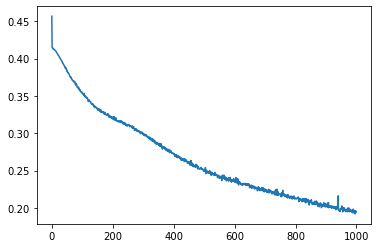

In [26]:
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.show()

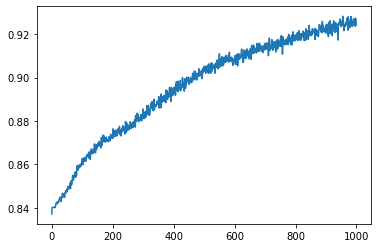

In [27]:
plt.plot(history.history["accuracy"], label="train_acc")
plt.show()